# Exercício

## Função erro

Considere a integral

$$
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x \mathrm{e}^{-t^2}\ \mathrm{d}t.
$$

Note que esta é uma integral definida, sobre a variável $t$, com o limite superior variável. Ou seja, o resultado é uma função de $x$, chamada de *função erro*, que aparece muito em cálculos de probabilidade. Não existe maneira conhecida de resolver esta integral analiticamente. A única forma de resolvê-la é numericamente.

**a.** Calcule numericamente $\mathrm{erf}(x=1)$. Escolha você mesmo o método (exceto a regra retangular) e o número de intervalos. Não esqueça de fazer um print do resultado.

*Resposta*: $\mathrm{erf}(1.0) \cong 0.8427$.

In [1]:
import numpy as np
from scipy.special import roots_legendre

def f(x):
    return np.exp(-x**2)

def calcula_I_gauss(lim2):
    I = 0.0
    u_k, w_linha_k = roots_legendre(20)

    for i in range(20):
        w_k = (lim2) * w_linha_k[i] / 2
        x_k = ((lim2) * u_k[i] / 2) + ((lim2) / 2)
        I = I + w_k * f(x_k)
    return 2 * I / np.sqrt(np.pi)

print(calcula_I_gauss(1.0))

0.8427007929497148


**b.** Programe a função abaixo tal que ela calcule $\mathrm{erf}(x)$ para um $x$ qualquer passado como parâmetro.
Utilizando a função que você programou, calcule $\mathrm{erf}(1.0)$. O resultado deve ser igual ao do item anterior.

In [2]:
def integralSimpsonGeral(lim2):
    lim1 = 0.0
    N = 200
    h = lim2 / N
    integralImp = 0
    integralPar = 0
    integral = 0
    xi = 0

    for i in range(1, N, 2): #impares
        xi = lim1 + i*h
        integralImp += f(xi)
        
    xi = 0
    for i in range(2, N, 2): #pares
        xi = lim1 + i*h
        integralPar += f(xi)
        
    integral = h * (4 * integralImp + 2 * integralPar + f(lim1) + f(lim2)) / 3
    resultado = 2 * integral / (np.sqrt(np.pi))
    return resultado

erf_1 = integralSimpsonGeral(1.0)
print(f'erf(1.0) = {erf_1:.4f}')

erf(1.0) = 0.8427


**c.** Usando a função programada acima, faça o gráfico de $\mathrm{erf}(x)$ para $-3 < x < 3$, com pontos em intervalos de $0.1$. Não esqueça das etiquetas dos eixos e do título.

Compare o seu gráfico com o que aparece na [página da Wikipedia sobre função erro](https://en.wikipedia.org/wiki/Error_function), para saber se o resultado está correto.

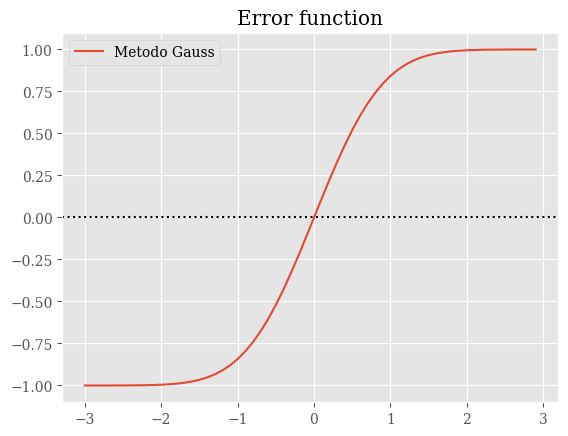

In [3]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

lista_N = []
lista_I = []

x = -3.0
while (x < 3):
    lista_N.append(x)
    lista_I.append(calcula_I_gauss(x))
    x += 0.1

fig, ax = plt.subplots()
ax.axhline(0.0, ls=':', color='k')
ax.plot(lista_N, lista_I, label="Metodo Gauss")
ax.set_title("Error function")
ax.legend()
plt.show()